<a href="https://colab.research.google.com/github/ckokobean/SFUHS-Computational-Modeling-and-Simulation/blob/master/Diabetes_Multiple_Regression_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
dataset=pd.read_csv('https://raw.githubusercontent.com/susanli2016/Machine-Learning-with-Python/master/diabetes.csv')

In [0]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [0]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


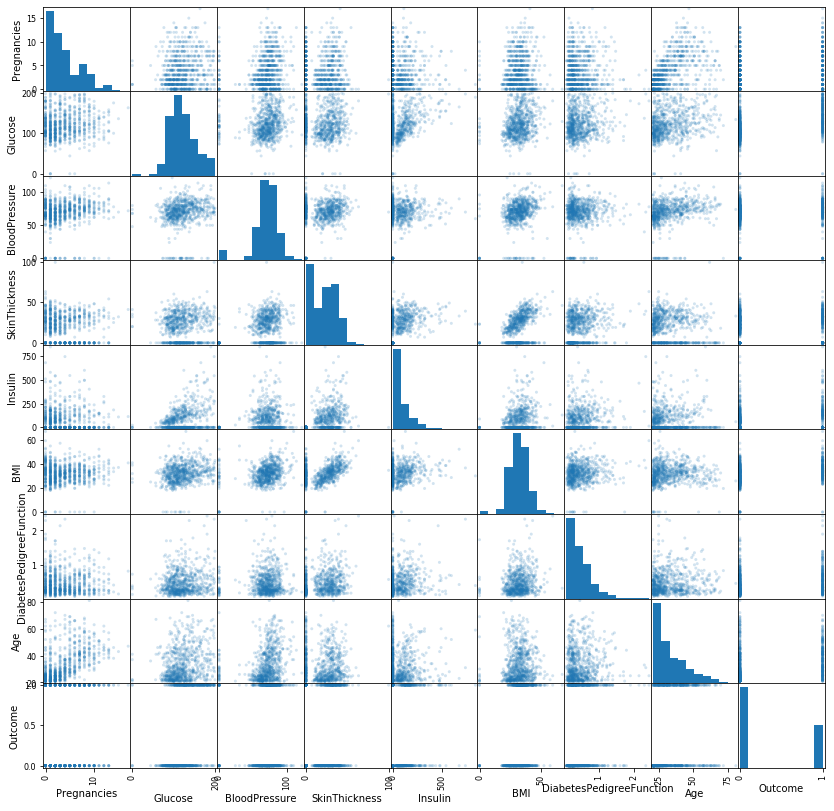

In [0]:
pd.plotting.scatter_matrix(dataset,alpha=0.2,figsize=(14,14));

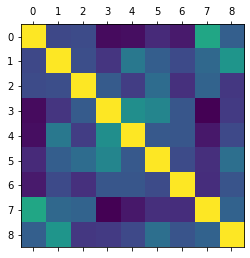

In [0]:
plt.matshow(dataset.corr())
plt.show()

In [0]:
X = dataset[['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
y = dataset['Outcome']

In [0]:
X.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,148,72,35,0,33.6,0.627,50
1,85,66,29,0,26.6,0.351,31
2,183,64,0,0,23.3,0.672,32
3,89,66,23,94,28.1,0.167,21
4,137,40,35,168,43.1,2.288,33


In [0]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.8,random_state=0)

In [0]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
coeff_df = pd.DataFrame(regressor.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Glucose,0.006270
BloodPressure,0.000717
SkinThickness,0.000782
Insulin,-0.000816
BMI,0.013000
DiabetesPedigreeFunction,0.177959
Age,0.002003


Since the scale of the variables are wildly different, we cannot really use the coefficient values to infer anything. However, we can see that the model makes sense with the signs. 

In [0]:
y_pred = regressor.predict(X_test)
y_pred

array([ 1.20913512e+00,  2.44044421e-01,  1.06128526e-01,  5.29963075e-01,
        2.65403291e-01,  8.65207675e-03,  5.89082100e-01,  8.24860744e-01,
        3.50605107e-01,  2.48815519e-01,  5.15148302e-01,  9.59588850e-01,
        3.61594243e-01,  2.21203961e-01,  1.07565136e-01,  3.24090431e-01,
        7.49323335e-01, -8.99208891e-02,  5.01774022e-01,  2.27994437e-01,
        6.83366443e-01,  5.43781825e-01,  1.50333749e-01,  6.92450054e-02,
        8.80631222e-03,  4.67939105e-01,  1.26903909e-01,  7.75389697e-01,
        2.17953336e-01,  2.11991529e-01,  3.94704611e-01,  3.39364984e-01,
        2.10946144e-01,  4.02292453e-01,  1.52145459e-01,  6.56558888e-01,
        3.55990786e-01,  2.03867785e-01,  3.47913320e-01,  7.02673047e-01,
        3.83282462e-01,  3.40353444e-01,  1.60271692e-01,  8.54655094e-01,
        4.31658956e-01, -1.21365294e-01,  1.16863474e-01,  2.45278993e-01,
        3.71950444e-01,  4.33947515e-01,  3.72847788e-01,  2.30008804e-01,
        5.82107638e-01,  

In [0]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
661,1,1.209135
122,0,0.244044
113,0,0.106129
14,1,0.529963
529,0,0.265403
...,...,...
110,1,0.579270
149,0,0.065365
152,1,0.700263
528,0,0.207408
